## IPL 2022 Data Analytics - EDA Phase ##

### Author: Ayush Pandey ###

In [16]:
# -------------------------------
# Tools: Pandas, NumPy, Seaborn, Matplotlib
# -------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

#### Step 1: Load the IPL 2022 Data ####

In [18]:
matches = pd.read_csv("IPL_Matches_2022.csv")
deliveries = pd.read_csv("IPL_Ball_by_Ball_2022.csv")

# Quick look
print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

Matches shape: (74, 20)
Deliveries shape: (17912, 17)


#### Step 2: Check for nulls, types, dups ####

In [20]:
print("\nMissing values in matches:")
print(matches.isnull().sum())

print("\nMissing values in deliveries:")
print(deliveries.isnull().sum())

matches.drop_duplicates(inplace=True)
deliveries.drop_duplicates(inplace=True)

# Convert 'match_date' to datetime if present
if 'match_date' in matches.columns:
    matches['match_date'] = pd.to_datetime(matches['match_date'])


Missing values in matches:
ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             74
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

Missing values in deliveries:
ID                       0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   0
non-striker              0
extra_type           16862
batsman_run              0
extras_run               0
total_run                0
non_boundary             0
isWicketDelivery         0
player_out           17000
kind                 17000
fielders_involved    17208
BattingTeam              0
dtype: int64


#### Step 3: Feature Engineering ####

In [ ]:
#### Step 4: Handling Missing Values ####

In [24]:
# Fill missing values in winner column if exists
if 'winner' in matches.columns:
    matches['winner'].fillna(matches['winner'].mode()[0], inplace=True)

# Fill umpires if available
for col in ['umpire_1', 'umpire_2']:
    if col in matches.columns:
        matches[col].fillna(method='ffill', inplace=True)

#### Step 5: EDA Visualizations ####

##### Top player of the match awards  #####

C:\Users\risha\AppData\Local\Temp\ipykernel_27380\3970105385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette="mako")


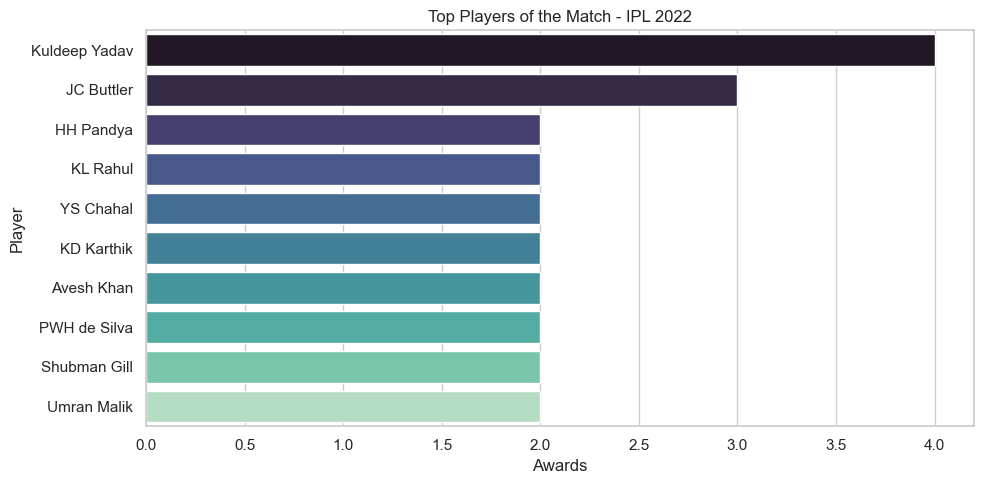

In [33]:

if 'Player_of_Match' in matches.columns:
    top_players = matches['Player_of_Match'].value_counts().head(10)
    sns.barplot(x=top_players.values, y=top_players.index, palette="mako")
    plt.title("Top Players of the Match - IPL 2022")
    plt.xlabel("Awards")
    plt.ylabel("Player")
    plt.tight_layout()
    plt.show()

##### Matches won by each team #####

C:\Users\risha\AppData\Local\Temp\ipykernel_27380\2754420094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='WinningTeam', data=matches, order=matches['WinningTeam'].value_counts().index, palette='coolwarm')


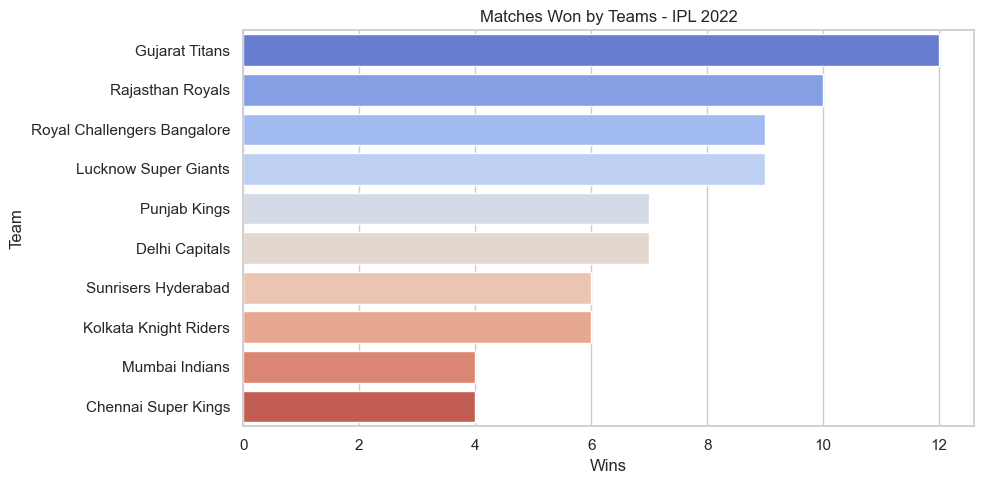

In [35]:
# Matches won by each team
if 'WinningTeam' in matches.columns:
    sns.countplot(y='WinningTeam', data=matches, order=matches['WinningTeam'].value_counts().index, palette='coolwarm')
    plt.title("Matches Won by Teams - IPL 2022")
    plt.xlabel("Wins")
    plt.ylabel("Team")
    plt.tight_layout()
    plt.show()

##### Margin across all matches in 2022 #####

C:\Users\risha\AppData\Local\Temp\ipykernel_27380\969328326.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(margin_series, shade=True, color="purple")


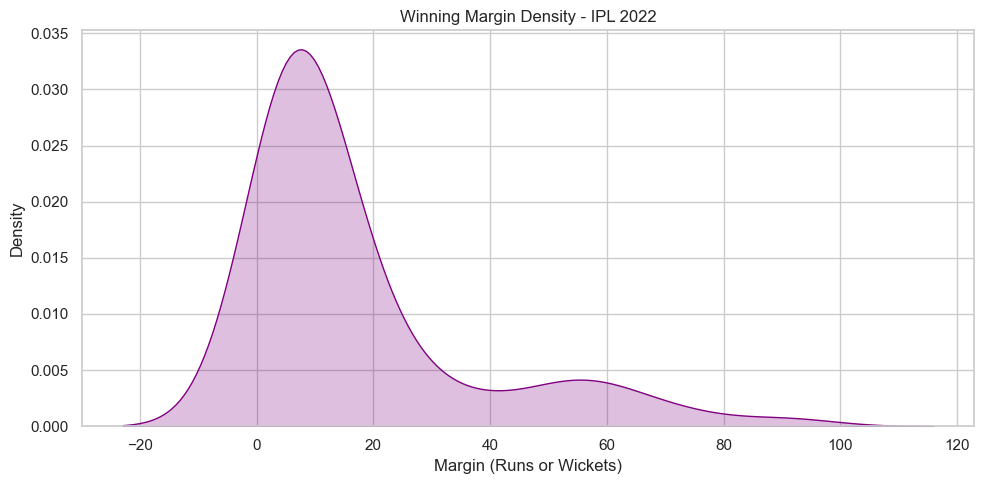

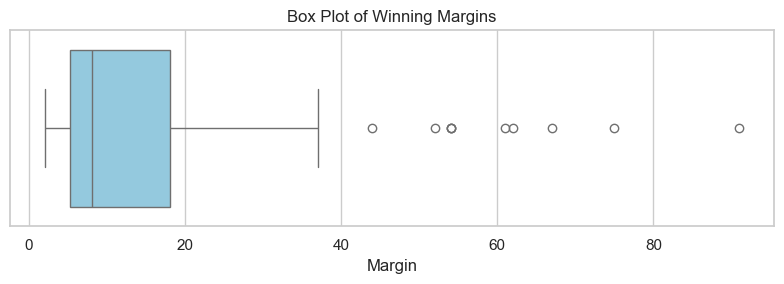

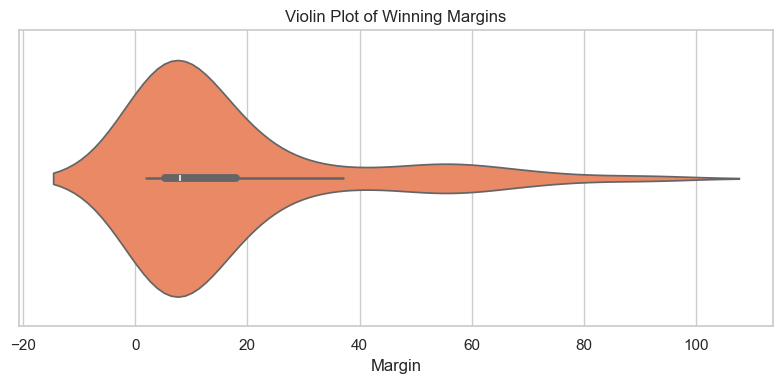

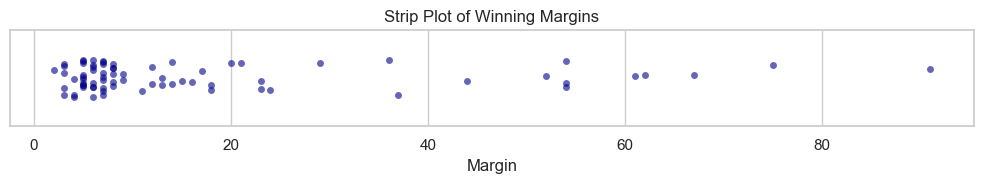

In [39]:
# Ensure margin is numeric
matches['Margin'] = pd.to_numeric(matches['Margin'], errors='coerce')
margin_series = matches['Margin'].dropna()

# -------------------------------
# 1. KDE Plot (Smooth Distribution)
# -------------------------------
plt.figure(figsize=(10, 5))
sns.kdeplot(margin_series, shade=True, color="purple")
plt.title("Winning Margin Density - IPL 2022")
plt.xlabel("Margin (Runs or Wickets)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Box Plot (Detect Outliers & Spread)
# -------------------------------
plt.figure(figsize=(8, 3))
sns.boxplot(x=margin_series, color="skyblue")
plt.title("Box Plot of Winning Margins")
plt.xlabel("Margin")
plt.tight_layout()
plt.show()

# -------------------------------
# 3. Violin Plot (Distribution + Density + Outliers)
# -------------------------------
plt.figure(figsize=(8, 4))
sns.violinplot(x=margin_series, color="coral")
plt.title("Violin Plot of Winning Margins")
plt.xlabel("Margin")
plt.tight_layout()
plt.show()

# -------------------------------
# 4. Strip Plot (Every Match Dot)
# -------------------------------
plt.figure(figsize=(10, 2))
sns.stripplot(x=margin_series, color="darkblue", alpha=0.6, jitter=0.2)
plt.title("Strip Plot of Winning Margins")
plt.xlabel("Margin")
plt.tight_layout()
plt.show()
